In [1]:
import numpy as np
import pandas as pd

import sklearn as sk

from sklearn import datasets, model_selection

from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# models and functions from scratch
from models.logistic_regression import LogisticRegression
from models.linear_discriminant_analysis import LDA
from models.support_vector_machine import SVM
from functions.functions import (cross_validation, display_boundary)

In [2]:
# Generating data
n = 100

rng = np.random.RandomState(2)
X_init, y_init = sk.datasets.make_classification(
    n_samples=n,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_repeated=0,
    n_clusters_per_class=1,
    random_state=rng,
)

dim = 2

(
    X_train_init,
    X_test_init,
    y_train_init,
    y_test_init,
) = sk.model_selection.train_test_split(X_init, y_init, test_size=0.2, random_state=42)

# Processing datasets for logistic regression
Xb_init = np.column_stack((X_train_init, np.ones(X_train_init.shape[0])))
Xtb_init = np.column_stack((X_test_init, np.ones(X_test_init.shape[0])))

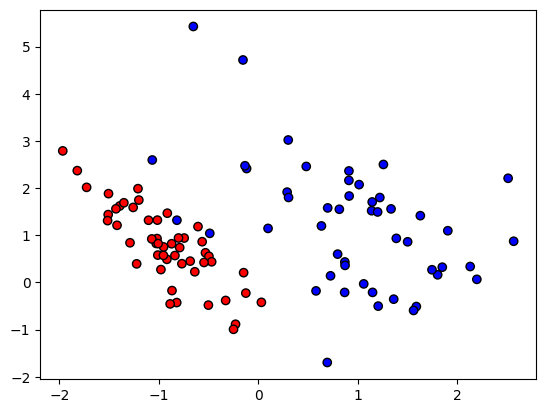

In [3]:
figure = plt.figure()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_init[:, 0], X_init[:, 1], c=y_init, cmap=cm_bright,edgecolors='k')

## 1) Training models

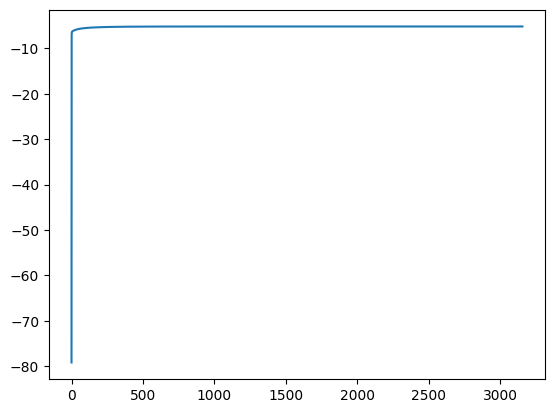

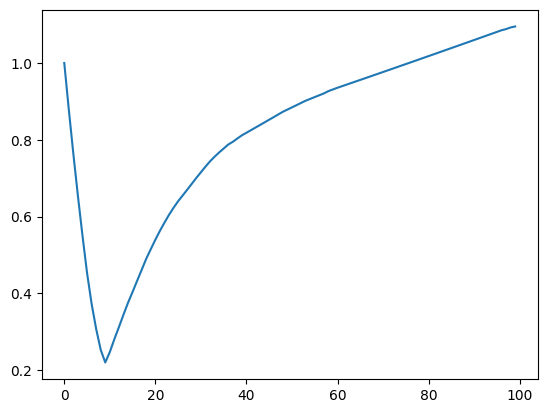

In [4]:
lr_init = LogisticRegression(eta = 1e-1, stuck_criteria = 1e-5)
loss_lr = lr_init.train(Xb_init, y_train_init)

lda_init = LDA()
lda_init.train(X_train_init, y_train_init)

svm_init = SVM(eta = 1e-3, batch_size=100, epochs=100)
loss_svm = svm_init.train(X_train_init, y_train_init)

plt.plot(loss_lr)
plt.figure()
plt.plot(loss_svm)

## 2) Comparing models for (0,0) prediction

In [5]:
print(f"Le modèle de Régression Logistique prédit la classe {lr_init.predict(np.array([[0, 0, 1]]))[0]} pour le point (0, 0)")
print(f"Le modèle LDA prédit la classe {lda_init.predict(np.array([[0, 0]]))[0]} pour le point (0, 0)")
print(f"Le modèle SVM prédit la classe {svm_init.predict(np.array([[0, 0]]))[0]} pour le point (0, 0)")

Le modèle de Régression Logistique prédit la classe 1 pour le point (0, 0)
Le modèle LDA prédit la classe 0 pour le point (0, 0)
Le modèle SVM prédit la classe 0 pour le point (0, 0)


## 3) Comparing boundary decisions

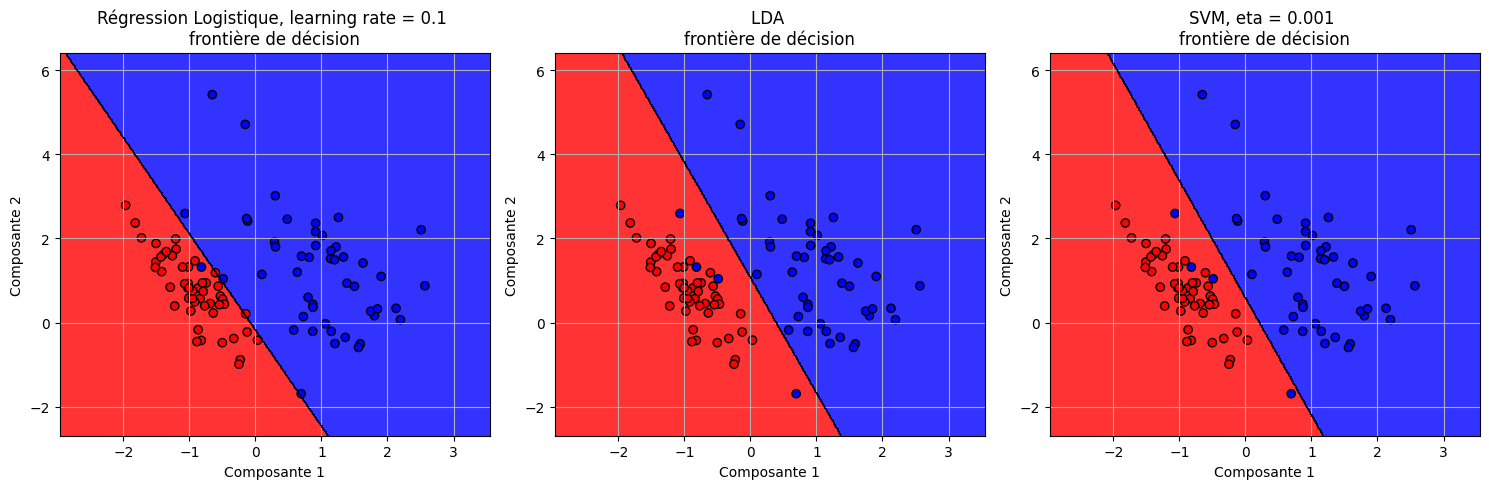

In [6]:
display_boundary(X_init, y_init, [lr_init, lda_init, svm_init])

## 4) Comparing error rates

In [7]:
print("---- Régression Logistique ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {lr_init.error_rate(Xb_init, y_train_init) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {lr_init.error_rate(Xtb_init, y_test_init) * 100}%\n")

print("---- LDA ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {lda_init.error_rate(X_train_init, y_train_init) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {lda_init.error_rate(X_test_init, y_test_init) * 100}%\n")

print("---- SVM ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {svm_init.error_rate(X_train_init, y_train_init) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {svm_init.error_rate(X_test_init, y_test_init) * 100}%\n")

---- Régression Logistique ----
Le taux d'erreur sur les données d'apprentissage est de: 2.5%
Le taux d'erreur sur les données test est de: 0.0%

---- LDA ----
Le taux d'erreur sur les données d'apprentissage est de: 3.75%
Le taux d'erreur sur les données test est de: 5.0%

---- SVM ----
Le taux d'erreur sur les données d'apprentissage est de: 3.75%
Le taux d'erreur sur les données test est de: 5.0%



# II- Data with outlier

In [8]:
#generation de données
n=100
rng = np.random.RandomState(2)
X_outlier, y_outlier = sk.datasets.make_classification(n_samples=n, n_features=2, n_redundant=0, n_informative=2, n_repeated=0, n_clusters_per_class=1, random_state=rng)

dim =2

X_train_outlier, X_test_outlier, y_train_outlier, y_test_outlier = sk.model_selection.train_test_split(X_outlier, y_outlier, test_size=.2, random_state=42)

# Transformation des labels pour un SVM
y_train_outlier_svm = np.where(y_train_outlier <= 0, -1, 1)

# inclure cette ligne pour la question II.7
X_train_outlier[0,:] = [5,5]

Xb_outlier=np.column_stack((X_train_outlier,np.ones(X_train_outlier.shape[0])))
Xtb_outlier=np.column_stack((X_test_outlier,np.ones(X_test_outlier.shape[0])))

## 1) Training models

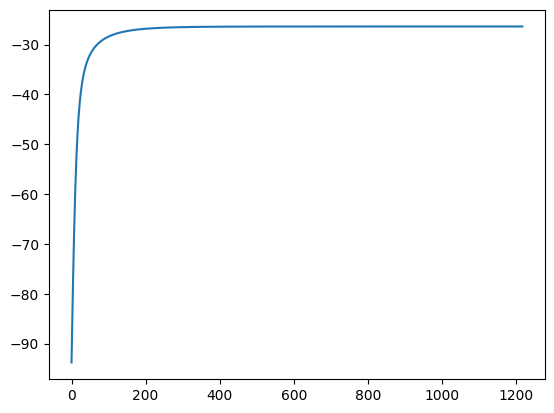

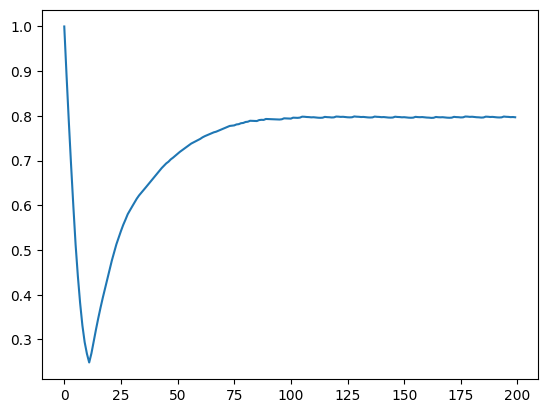

In [9]:
lr_outlier = LogisticRegression(eta = 1e-3, stuck_criteria = 1e-5)
loss_lr = lr_outlier.train(Xb_outlier, y_train_outlier)


lda_outlier = LDA()
lda_outlier.train(X_train_outlier, y_train_outlier)

svm_outlier = SVM(eta = 1e-3, batch_size=32, epochs=200)
loss_svm = svm_outlier.train(X_train_outlier, y_train_outlier)

plt.plot(loss_lr)
plt.figure()
plt.plot(loss_svm)

## 1) Comparing boundary decisions

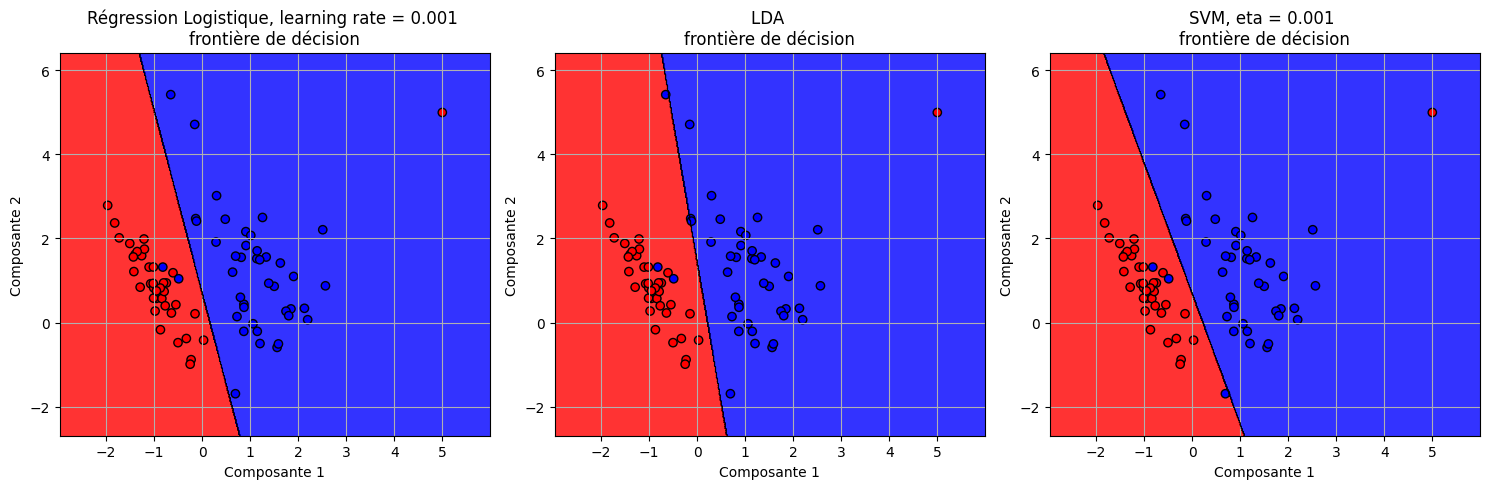

In [10]:
display_boundary(X_train_outlier, y_train_outlier, [lr_outlier, lda_outlier, svm_outlier])

## 2) Comparaisons des prédictions pour le point (0,0)

In [11]:
print(f"Le modèle Régression Logistique prédit {lr_outlier.predict(np.array([[0, 0, 1]]))} pour le point (0, 0)")
print(f"Le modèle LDA prédit {lda_outlier.predict(np.array([[0, 0]]))} pour le point (0, 0)")
print(f"Le modèle LDA prédit {svm_outlier.predict(np.array([[0, 0]]))} pour le point (0, 0)")

Le modèle Régression Logistique prédit [0] pour le point (0, 0)
Le modèle LDA prédit [0] pour le point (0, 0)
Le modèle LDA prédit [0] pour le point (0, 0)


## 3) Comparing error rates

In [12]:
print("---- Régression Logistique ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {lr_outlier.error_rate(Xb_outlier, y_train_outlier) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {lr_outlier.error_rate(Xtb_outlier, y_test_outlier) * 100}%\n")

print("---- LDA ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {lda_outlier.error_rate(X_train_outlier, y_train_outlier) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {lda_outlier.error_rate(X_test_outlier, y_test_outlier) * 100}%\n")

print("---- SVM ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {svm_outlier.error_rate(X_train_outlier, y_train_outlier) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {svm_outlier.error_rate(X_test_outlier, y_test_outlier) * 100}%\n")

---- Régression Logistique ----
Le taux d'erreur sur les données d'apprentissage est de: 3.75%
Le taux d'erreur sur les données test est de: 5.0%

---- LDA ----
Le taux d'erreur sur les données d'apprentissage est de: 5.0%
Le taux d'erreur sur les données test est de: 5.0%

---- SVM ----
Le taux d'erreur sur les données d'apprentissage est de: 5.0%
Le taux d'erreur sur les données test est de: 5.0%



## 4) Leave one out cross validation

In [13]:
# Temps d'exécution: 44 sec
# Résultat:
# ---- Régression Logistique ----
# Taux d'erreur: 5.00%

# ---- LDA ----
# Taux d'erreur: 7.50%

# ---- SVM ----
# Taux d'erreur: 5.00%

print("---- Régression Logistique ----")
print(f"Taux d'erreur: {cross_validation(Xb_outlier, y_train_outlier, lr_outlier) * 100:.2f}%\n")

print("---- LDA ----")
print(f"Taux d'erreur: {cross_validation(X_train_outlier, y_train_outlier, lda_outlier) * 100:.2f}%\n")

print("---- SVM ----")
print(f"Taux d'erreur: {cross_validation(X_train_outlier, y_train_outlier, svm_outlier) * 100:.2f}%\n")

---- Régression Logistique ----


Taux d'erreur: 5.00%

---- LDA ----
Taux d'erreur: 7.50%

---- SVM ----
Taux d'erreur: 5.00%



## III- Correlated and higher dimension data

In [14]:
n = 100
rng = np.random.RandomState(2)

# Increase the number of dimensions and add correlated variables
dim = 4 # For example, increase to 4 dimensions
X_dim, y_dim = sk.datasets.make_classification(
    n_samples=n,
    n_features=dim,
    n_redundant=1,
    n_informative=3,
    n_repeated = 0,
    n_clusters_per_class=1,
    random_state=rng
)

# Split the data
X_train_dim, X_test_dim, y_train_dim, y_test_dim = sk.model_selection.train_test_split(X_dim, y_dim, test_size=.2, random_state=rng)

Xb_dim = np.column_stack((X_train_dim, np.ones(X_train_dim.shape[0])))
Xtb_dim = np.column_stack((X_test_dim, np.ones(X_test_dim.shape[0])))

## 1) Training models

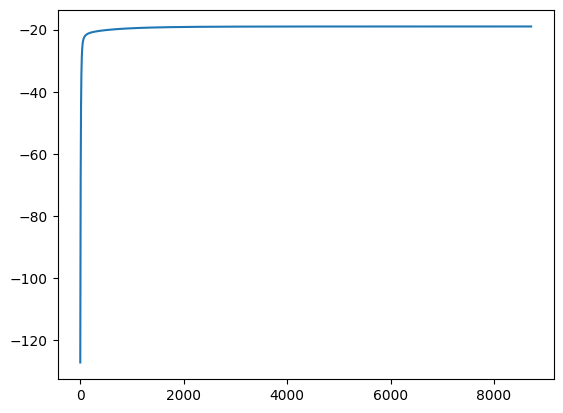

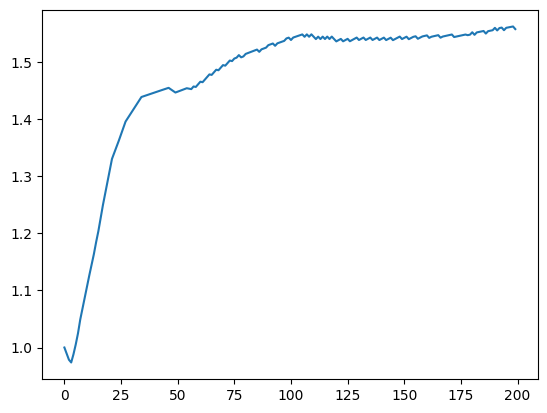

In [15]:
lr_dim = LogisticRegression(eta = 1e-3, stuck_criteria = 1e-5)
loss_lr = lr_dim.train(Xb_dim, y_train_dim)


lda_dim = LDA()
lda_dim.train(X_train_dim, y_train_dim)

svm_dim = SVM(eta = 1e-3, batch_size=32, epochs=200)
loss_svm = svm_dim.train(X_train_dim, y_train_dim)

plt.plot(loss_lr)
plt.figure()
plt.plot(loss_svm)

## 2) Comparing error rates

In [16]:
print("---- Régression Logistique ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {lr_dim.error_rate(Xb_dim, y_train_dim) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {lr_dim.error_rate(Xtb_dim, y_test_dim) * 100}%\n")

print("---- LDA ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {lda_dim.error_rate(X_train_dim, y_train_dim) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {lda_dim.error_rate(X_test_dim, y_test_dim) * 100}%\n")

print("---- SVM ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {svm_dim.error_rate(X_train_dim, y_train_dim) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {svm_dim.error_rate(X_test_dim, y_test_dim) * 100}%\n")

---- Régression Logistique ----
Le taux d'erreur sur les données d'apprentissage est de: 11.25%
Le taux d'erreur sur les données test est de: 10.0%

---- LDA ----
Le taux d'erreur sur les données d'apprentissage est de: 11.25%
Le taux d'erreur sur les données test est de: 15.0%

---- SVM ----
Le taux d'erreur sur les données d'apprentissage est de: 11.25%
Le taux d'erreur sur les données test est de: 10.0%



## 3) Leave one out cross validation

In [17]:
# Temps d'exécution: 1-2min
# Réponse en général:
# dim = 20, n_redundant)0
      # RL: 15%
      # LDA: 12,5%
      # SVM: 12,5%

# dim = 4, n_redundant=3
# RL: 10%
# LDA:14%
# SVM: 14%

print("---- Régression Logistique ----")
print(f"Taux d'erreur: {cross_validation(Xb_dim, y_train_dim, lr_dim) * 100:.2f}%\n")

print("---- LDA ----")
print(f"Taux d'erreur: {cross_validation(X_train_dim, y_train_dim, lda_dim) * 100:.2f}%\n")

print("---- SVM ----")
print(f"Taux d'erreur: {cross_validation(X_train_dim, y_train_dim, svm_dim) * 100:.2f}%\n")

---- Régression Logistique ----
Taux d'erreur: 12.50%

---- LDA ----
Taux d'erreur: 13.75%

---- SVM ----
Taux d'erreur: 13.75%



## III A vous de jouer (7 pts)
10. Trouver/Générer/Récolter des données adéquates pour l'application d'un algorithme de classification binaire. Décrire ces données (origine, nombre et types de variables, analyse statistique des variables, nombre d'observations, contexte,...) (2pts)
11. Appliquer vos codes de régression logistique et de LDA et reporter les performances obtenues (en apprentissage, en test ou en validation croisées) et commenter (1pts)
12. Trouver une autre méthode à laquelle comparer les deux codes que vous avez développés, décrire (brièvement) le fonctionnement de cette troisème approche et l'appliquer sur les données (de la question 10). On pourra développer soit-même le code ou utiliser une librairie existante. Comparer et discuter les performances obtenues (4pts)

### 10- Application sur un dataset sur le cancer

In [21]:
from sklearn import datasets, model_selection
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

cancer_datasets = datasets.load_breast_cancer()
X_cancer, y_cancer = cancer_datasets.data, cancer_datasets.target
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = sk.model_selection.train_test_split(X_cancer, y_cancer, test_size = 0.2, random_state=1234)

# Transformation des labels pour un SVM
y_train_cancer_svm = np.where(y_train_cancer <= 0, -1, 1)
y_test_cancer_svm = np.where(y_test_cancer <= 0, -1, 1)

Xb_cancer= np.column_stack((X_train_cancer, np.ones(X_train_cancer.shape[0])))
Xtb_cancer = np.column_stack((X_test_cancer, np.ones(X_test_cancer.shape[0])))

#### Analyse matrice de corrélation


In [28]:
import seaborn as sns
cancer_df = pd.DataFrame(X_cancer)
corr = cancer_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= cancer_df.columns, yticklabels= cancer_df.columns,
           cmap= 'viridis')


ModuleNotFoundError: No module named 'seaborn'

#### Analyse valeurs aberrantes

In [27]:
cancer_df = pd.DataFrame(X_train_cancer)
# Function to detect outliers using IQR
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect outliers for each column
outliers_dict = {}
for col in cancer_df.columns:
    outliers_dict[col] = find_outliers(cancer_df[col])
print("Valeurs aberrantes:")
print(outliers_dict)

Valeurs aberrantes:
{0: 27     23.29
108    24.25
141    22.27
146    23.09
185    23.51
207    27.22
302    23.27
312    25.73
313    22.01
326    28.11
399    25.22
411    23.21
Name: 0, dtype: float64, 1: 18     31.12
44     32.47
159    30.62
261    33.81
362    33.56
421    30.72
Name: 1, dtype: float64, 2: 27     158.9
108    166.2
141    152.8
146    152.1
185    155.1
207    182.1
302    152.1
312    174.2
313    147.2
315    147.3
326    188.5
399    171.5
411    153.5
Name: 2, dtype: float64, 3: 18     1419.0
27     1685.0
80     1546.0
108    1761.0
141    1509.0
142    1479.0
146    1682.0
185    1747.0
194    1404.0
207    2250.0
302    1686.0
309    1384.0
312    2010.0
313    1482.0
315    1491.0
326    2499.0
346    1347.0
364    1326.0
372    1364.0
399    1878.0
411    1670.0
451    1386.0
Name: 3, dtype: float64, 4: 108    0.14470
293    0.05263
358    0.13710
387    0.13980
429    0.14250
Name: 4, dtype: float64, 5: 89     0.2776
108    0.2867
141    0.2768
196    0

#### 1- Entrainement des modèles (descente de gradient)

d:\vsc-workspace\ml_introduction\models\logistic_regression.py:76: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, b)))


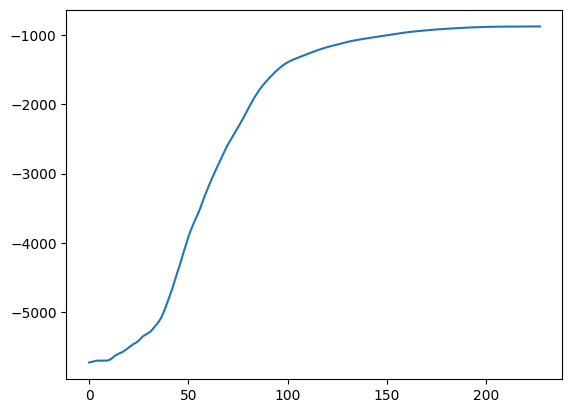

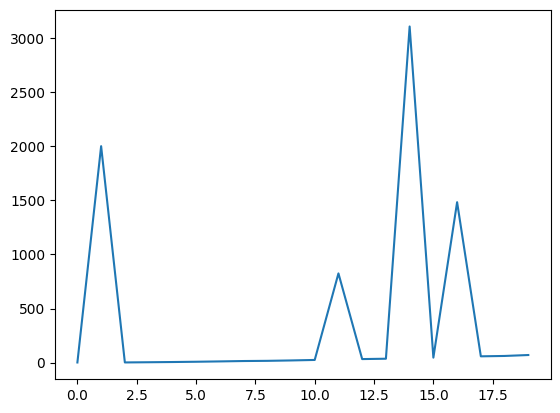

In [23]:
# Possible d'exécuter plusieurs fois car les modèles peuvent mal s'entrainer.


lr_cancer = LogisticRegression(eta = 1e-8, stuck_criteria = 1e-10)
loss_lr = lr_cancer.train(Xb_cancer, y_train_cancer)


lda_cancer = LDA()
lda_cancer.train(X_train_cancer, y_train_cancer)

svm_cancer = SVM(eta = 1e-3, epochs = 20)
loss_svm = svm_cancer.train(X_train_cancer, y_train_cancer)

plt.plot(loss_lr)
plt.figure()
plt.plot(loss_svm)

#### 2- Comparaison des Taux d'erreur

In [24]:
print("---- Régression Logistique ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {lr_cancer.error_rate(Xb_cancer, y_train_cancer) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {lr_cancer.error_rate(Xtb_cancer, y_test_cancer) * 100}%\n")

print("---- LDA ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {lda_cancer.error_rate(X_train_cancer, y_train_cancer) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {lda_cancer.error_rate(X_test_cancer, y_test_cancer) * 100}%\n")

print("---- SVM ----")
print(f"Le taux d'erreur sur les données d'apprentissage est de: {svm_cancer.error_rate(X_train_cancer, y_train_cancer) * 100}%")
print(f"Le taux d'erreur sur les données test est de: {svm_cancer.error_rate(X_test_cancer, y_test_cancer) * 100}%\n")

---- Régression Logistique ----
Le taux d'erreur sur les données d'apprentissage est de: 10.76923076923077%
Le taux d'erreur sur les données test est de: 11.403508771929824%

---- LDA ----
Le taux d'erreur sur les données d'apprentissage est de: 3.076923076923077%
Le taux d'erreur sur les données test est de: 4.385964912280701%

---- SVM ----
Le taux d'erreur sur les données d'apprentissage est de: 36.26373626373626%
Le taux d'erreur sur les données test est de: 30.701754385964914%



#### 3- Validation croisées à n-block des modèles

In [ ]:
# Temps d'exécution: 5 min
# Réponse en moyenne:
# ---- Régression Logistique ----
# Taux d'erreur: 34.51%

# ---- LDA ----
# Taux d'erreur: 3.96%

# ---- SVM ----
# Taux d'erreur: 26.59%

print("---- Régression Logistique ----")
print(f"Taux d'erreur: {cross_validation(Xb_cancer, y_train_cancer, lr_cancer) * 100:.2f}%\n")

print("---- LDA ----")
print(f"Taux d'erreur: {cross_validation(X_train_cancer, y_train_cancer, lda_cancer) * 100:.2f}%\n")

print("---- SVM ----")
print(f"Taux d'erreur: {cross_validation(X_train_cancer, y_train_cancer, svm_cancer) * 100:.2f}%\n")

#### Matrice de confusion et importance des features

In [26]:
# Evaluer le modèle
classification_report = classification_report(y_test_cancer,lr_cancer.predict(Xtb_cancer))
print(f'La précision est de {1 -lr_cancer.error_rate(Xtb_cancer, y_test_cancer):.2f}%')


# Matrice de confusion
cm  = confusion_matrix(y_test_cancer,y_predic)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=clf.classes_)
disp.plot()
plt.show()

# Importance des features
importance = clf.coef_[0]
for i,v in enumerate(importance):
  print('Feature %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

ValueError: shapes (114,31) and (32,) not aligned: 31 (dim 1) != 32 (dim 0)